In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [9]:
df = pd.read_csv('data/data.csv')
dataframe = pd.DataFrame(df)
sns.set_theme(style='ticks', 
              palette='Spectral', 
              rc={'figure.dpi': 150, 'figure.figsize': (5, 3.75)}, 
              font_scale=0.65)


In [5]:
df.dtypes

Title                       object
Author                      object
Year                       float64
Sizes noted in paper        object
Nodes avg                  float64
Edges avg                  float64
Density avg                float64
Directed/Undirected         object
GRAPH FACTORS              float64
Type                        object
Static/Dynamic              object
Attributes                  object
Structure                   object
Layout                      object
Real/Generated              object
STUDY DESIGN               float64
Number participants         object
Nature participants         object
Within/between              object
HCI FACTORS                float64
Type of task                object
Type of interaction         object
Unnamed: 22                 object
General category            object
Application Area            object
Improvement relates to      object
Unnamed: 26                 object
dtype: object


         'Year',
 'Sizes noted in paper',
 'Nodes',
 'Edges',
 'Density',
 'Type',
 'Static/Dynamic',
 'Attributes',
 'Structure',
 'Layout',
 'Real/Generated',

 'Number participants',
 'Nature participants',
 'Within/between',

 'Type of task',
 'Type of interaction',


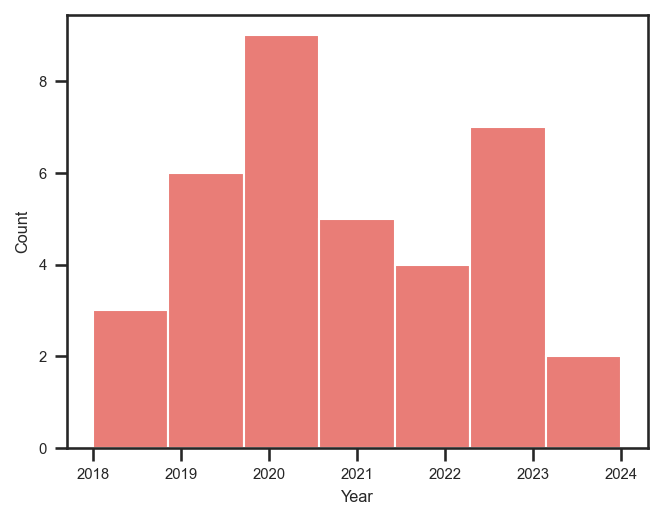

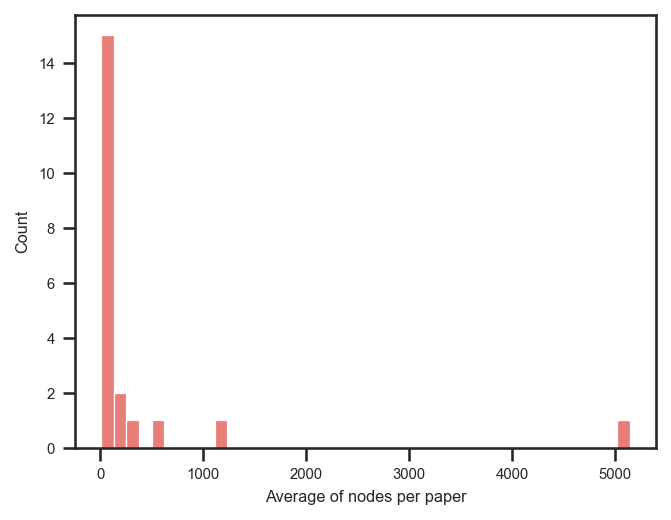

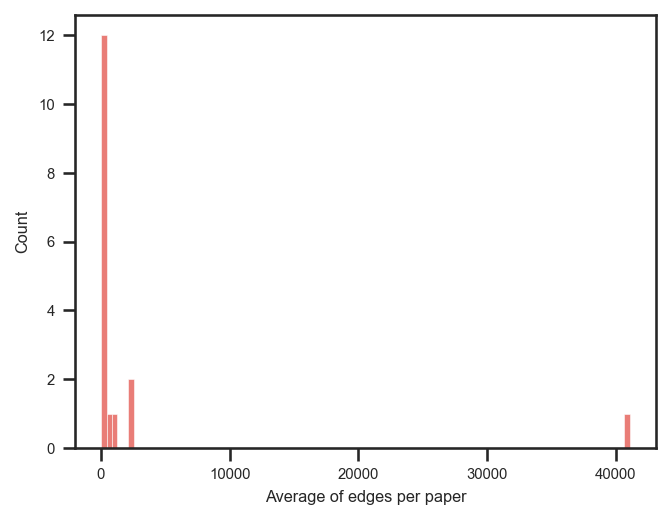

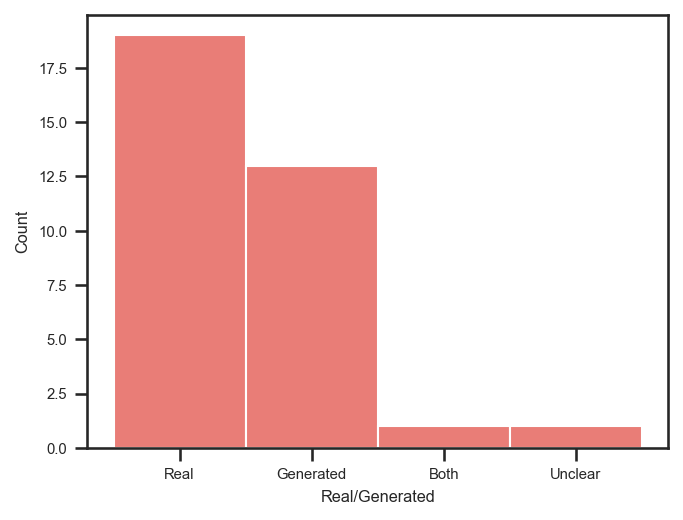

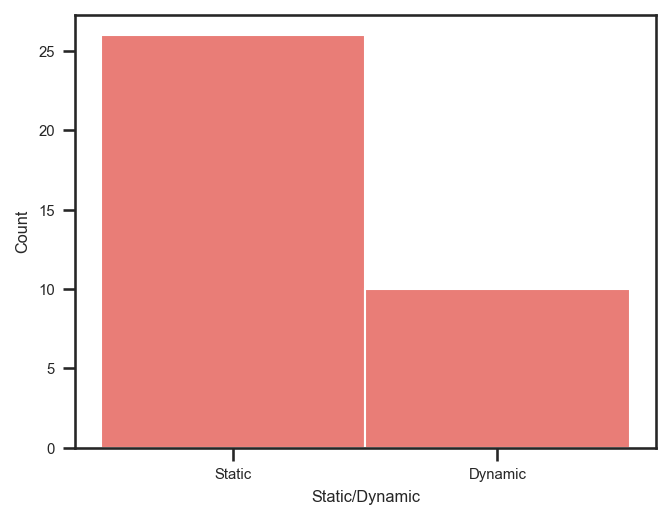

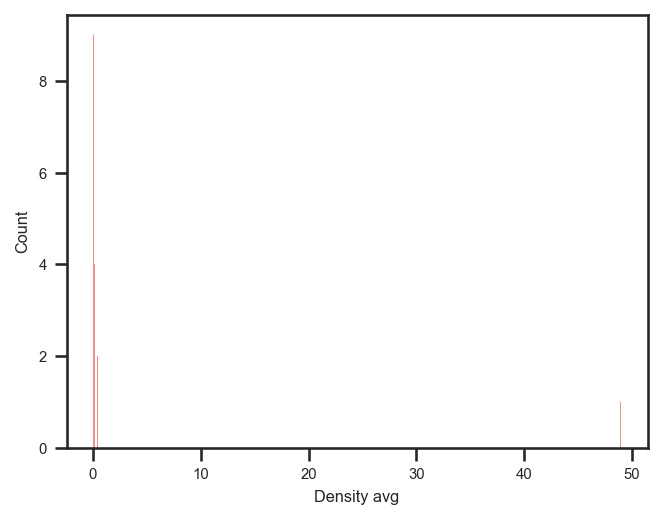

In [10]:

sns.set_theme(style='ticks',
              palette='Spectral',
              rc={'figure.dpi': 150, 'figure.figsize': (5, 3.75)},
              font_scale=0.65)

sns.histplot(data=dataframe,x="Year")
plt.show()

sns.histplot(data=dataframe,x="Nodes avg", )
plt.xlabel("Average of nodes per paper")

plt.show()

sns.histplot(data=dataframe,x="Edges avg")
plt.xlabel("Average of edges per paper")

plt.gca().set_xscale("linear")
plt.show()


sns.histplot(data=dataframe,x="Real/Generated")
plt.show()

sns.histplot(data=dataframe,x="Static/Dynamic")
plt.show()

sns.histplot(data=dataframe,x="Density avg")
plt.gca().set_xscale("linear")

plt.show()


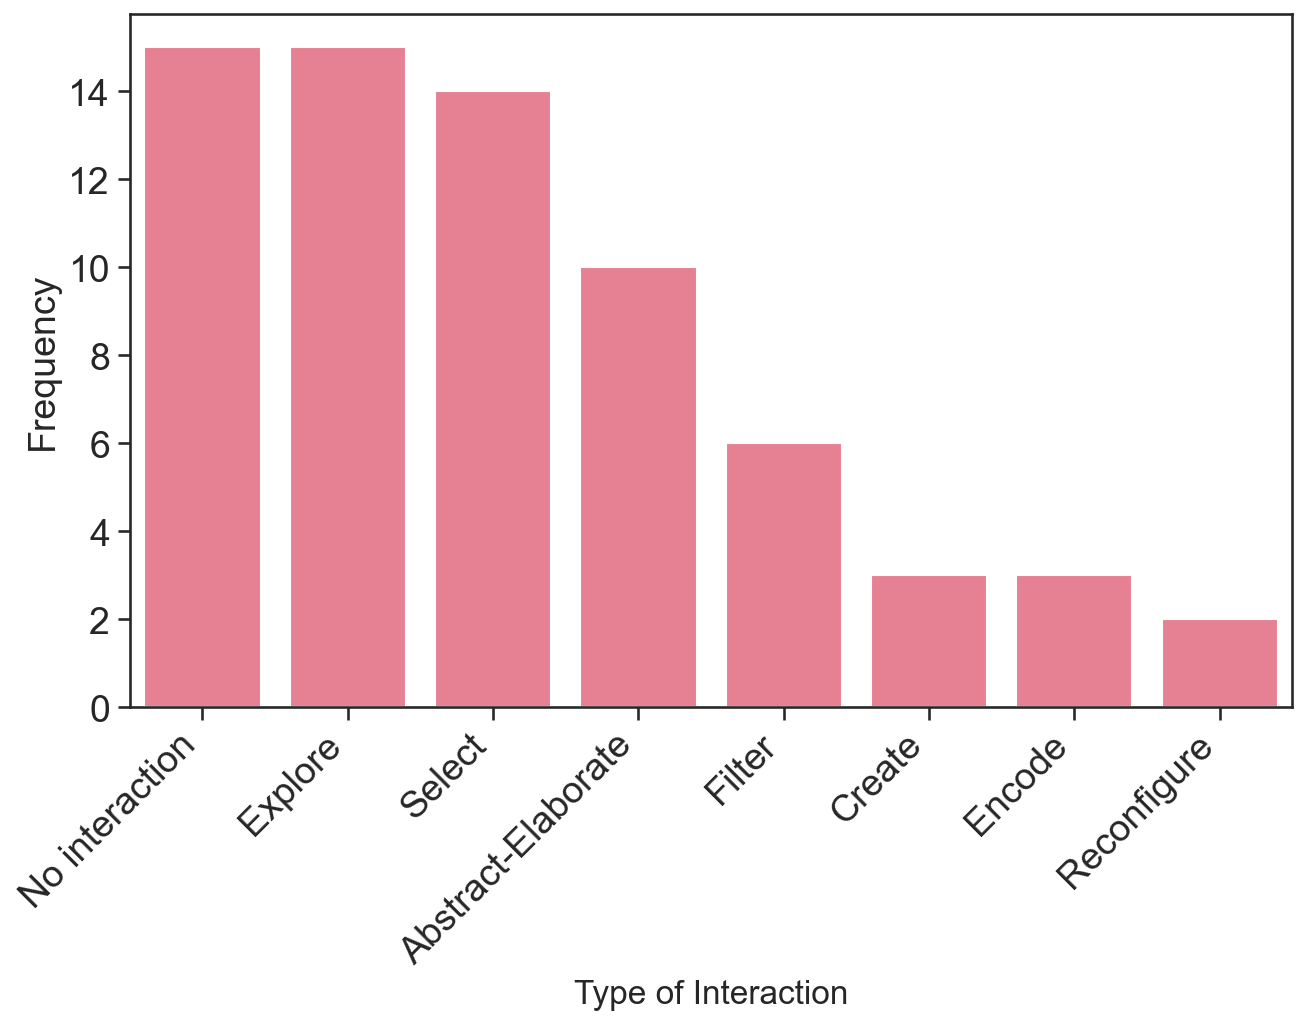

In [23]:

# Load the dataset
file_path = './data/data.csv'
data = pd.read_csv(file_path)

# Extract the 'Type of interaction' column
interaction_types = data['Type of interaction']

# Split the 'Type of interaction' column values by '/' and aggregate the counts
interaction_split = interaction_types.dropna().str.split('/')
interaction_aggregated = interaction_split.explode().value_counts()

# Plot the aggregated histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=interaction_aggregated.index, y=interaction_aggregated.values)
plt.xlabel('Type of Interaction', fontsize= 16)
plt.ylabel('Frequency', fontsize= 18)
plt.xticks(rotation=45, ha='right', fontsize= 18)
plt.yticks(fontsize=18)
plt.show()


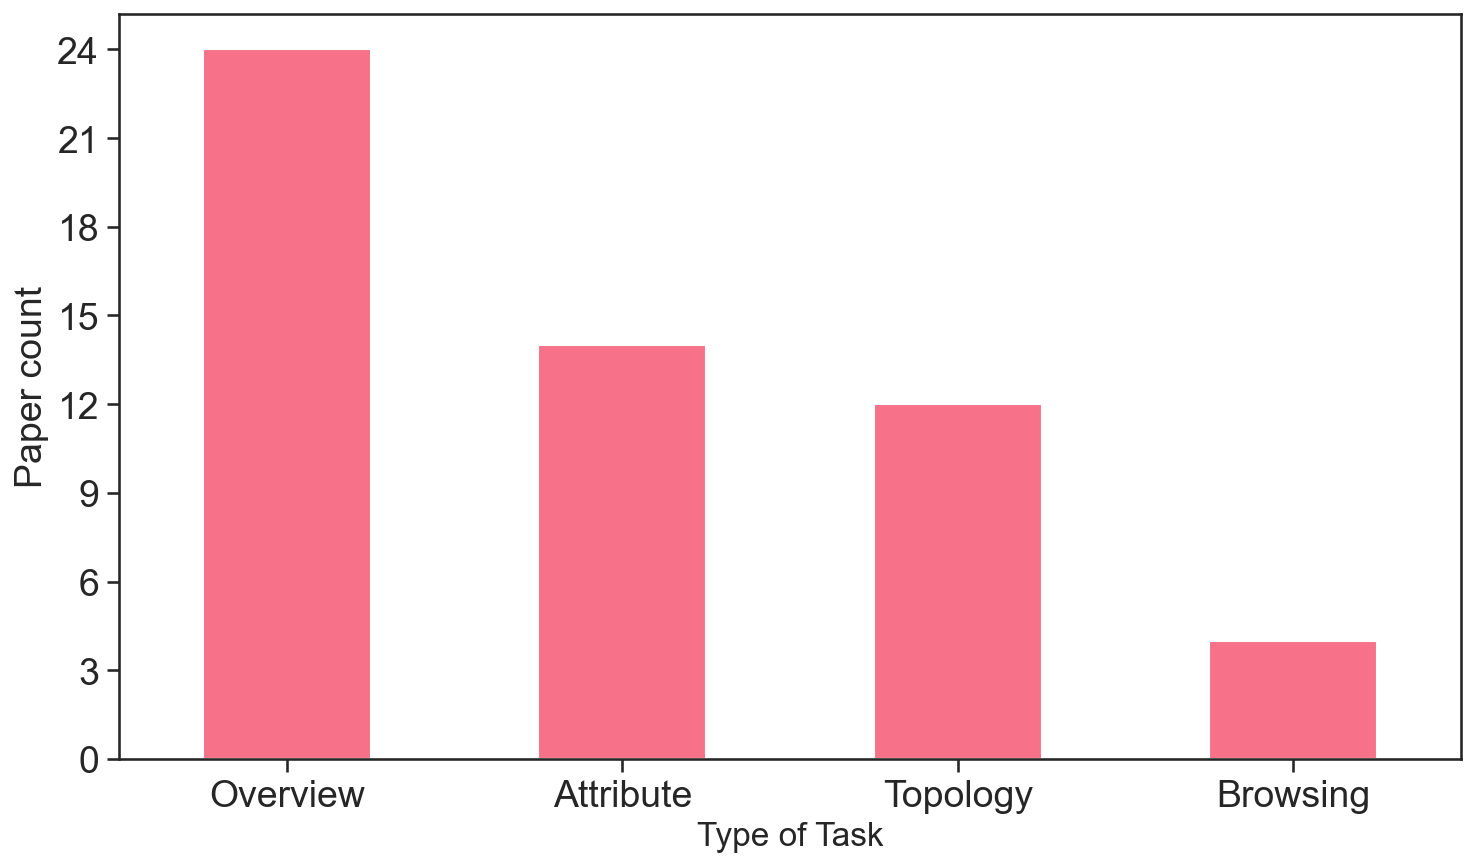

In [229]:

# Load the CSV file
file_path = './data/data.csv'
df = pd.read_csv(file_path)

# Split the values in 'Type of task' by '/'
df['Type of task'] = df['Type of task'].str.split('/')

# Explode the list to get each task type in a separate row
df_exploded = df.explode('Type of task')

# Drop rows where 'Type of task' is NaN
df_exploded = df_exploded.dropna(subset=['Type of task'])

# Plot a histogram of the 'Type of task'
plt.figure(figsize=(10, 6))
ax = df_exploded['Type of task'].value_counts().plot(kind='bar')
plt.xlabel('Type of Task', fontsize=16)
plt.ylabel('Paper count', fontsize=18)
plt.xticks(rotation=0, fontsize= 18)
plt.yticks(fontsize=18)

plt.tight_layout()

# Set y-axis to display whole numbers only
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Save the plot to a file
histogram_path = 'task_type_histogram.png'
plt.savefig(histogram_path)

# Show the plot
plt.show()

                                                Title  \
0   GraphDescriptor: Augmenting Node-Link Diagrams...   
1   The Role of Working Memory Capacity in Graph R...   
2          User Evaluation of Group-in-a-Box Variants   
3   Edit-History Vis: An Interactive Visual Explor...   
4    KernelGraph: Understanding the kernel in a graph   
5   Riverside: A design study on visualization for...   
6   Calliope-Net: Automatic Generation of Graph Da...   
7   Color-Encoded Links Improve Homophily Percepti...   
8   Exemplar-based Layout Fine-tuning for Node-lin...   
9     Graph Exploration with Embedding-Guided Layouts   
10  Evaluating Animation Parameters for Morphing E...   
11              On the Perception of Small Sub-graphs   
12  Visual Similarity Perception of Directed Acycl...   
13  Augmenting Node-Link Diagrams with Topographic...   
14  Egocentric Network Exploration for Immersive A...   
15  MotionGlyphs: Visual Abstraction of Spatio-Tem...   
16  NEVA: Visual Analytics to I

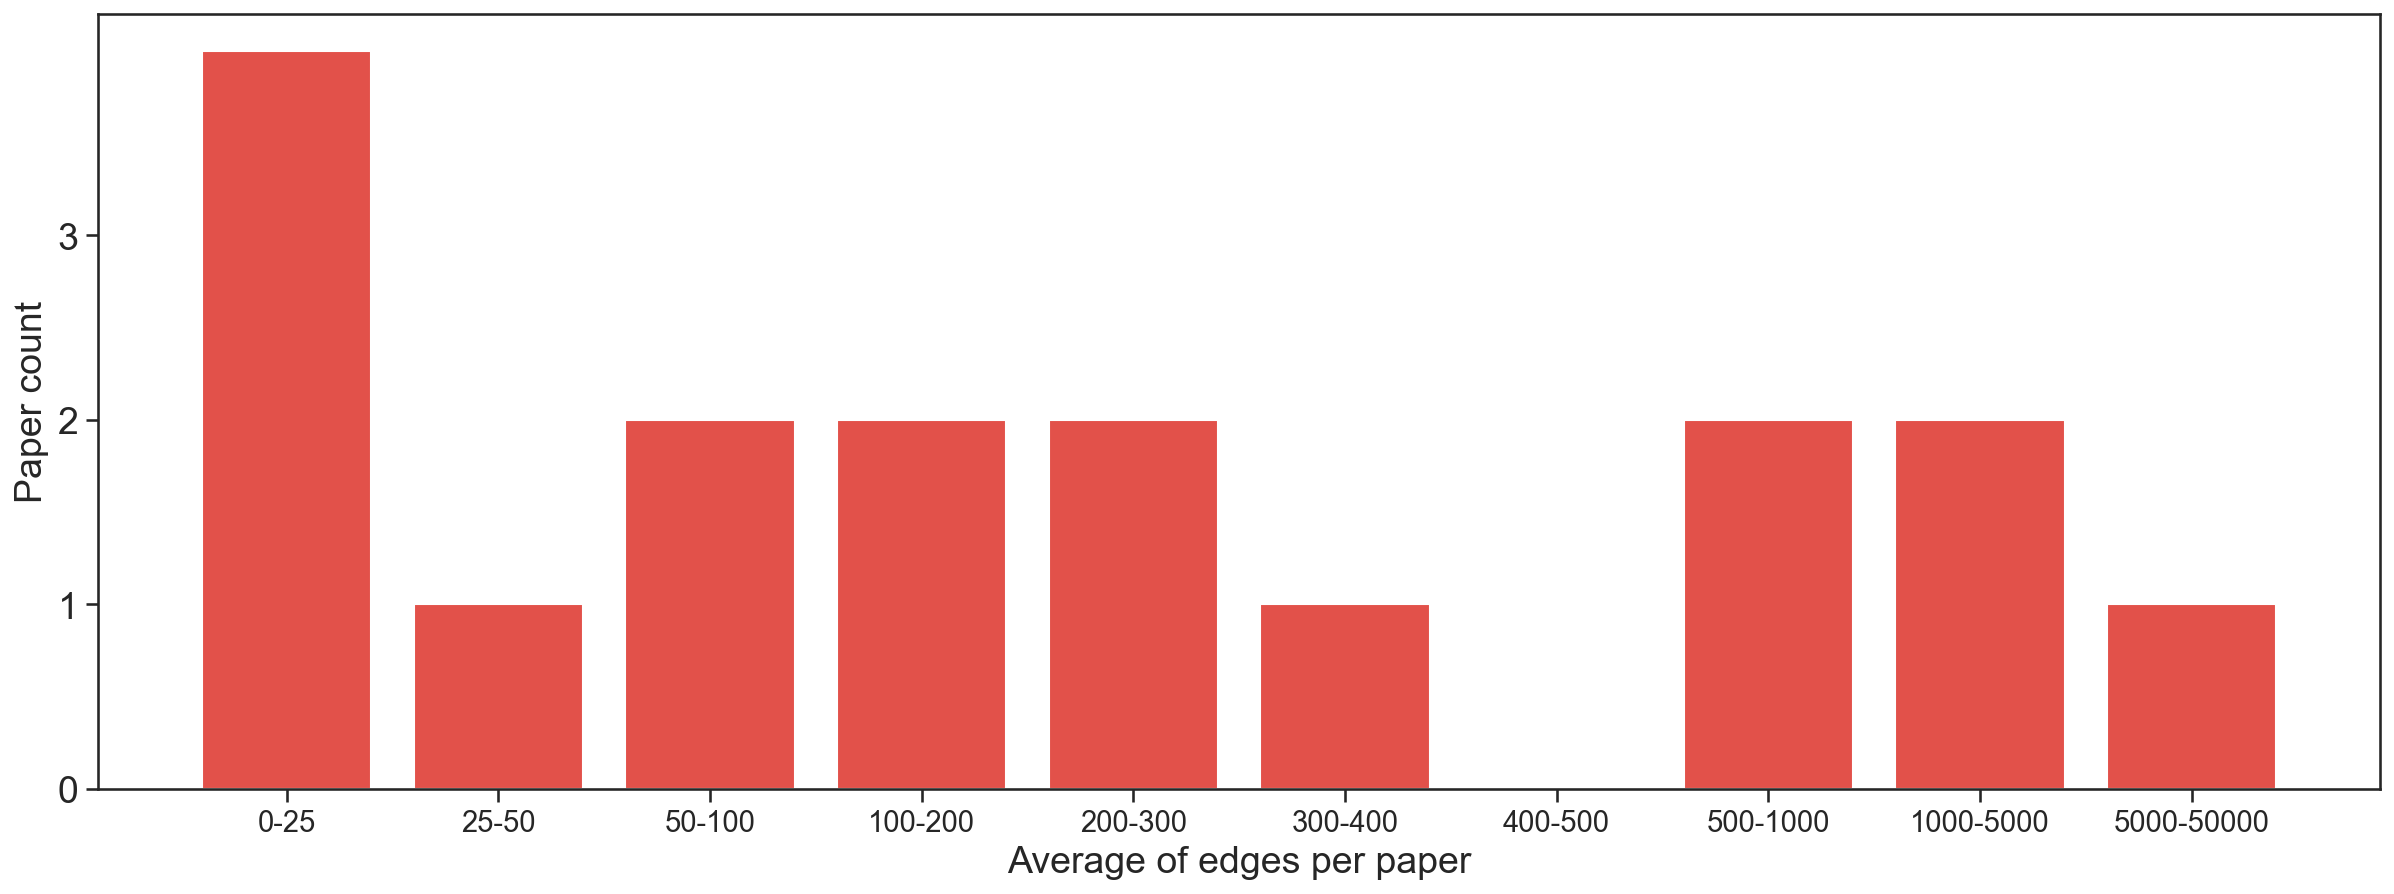

Bin
0-25          7
25-50         3
50-100        3
100-200       4
200-300       1
300-400       0
400-500       0
500-1000      1
1000-5000     1
5000-10000    1
Name: count, dtype: int64


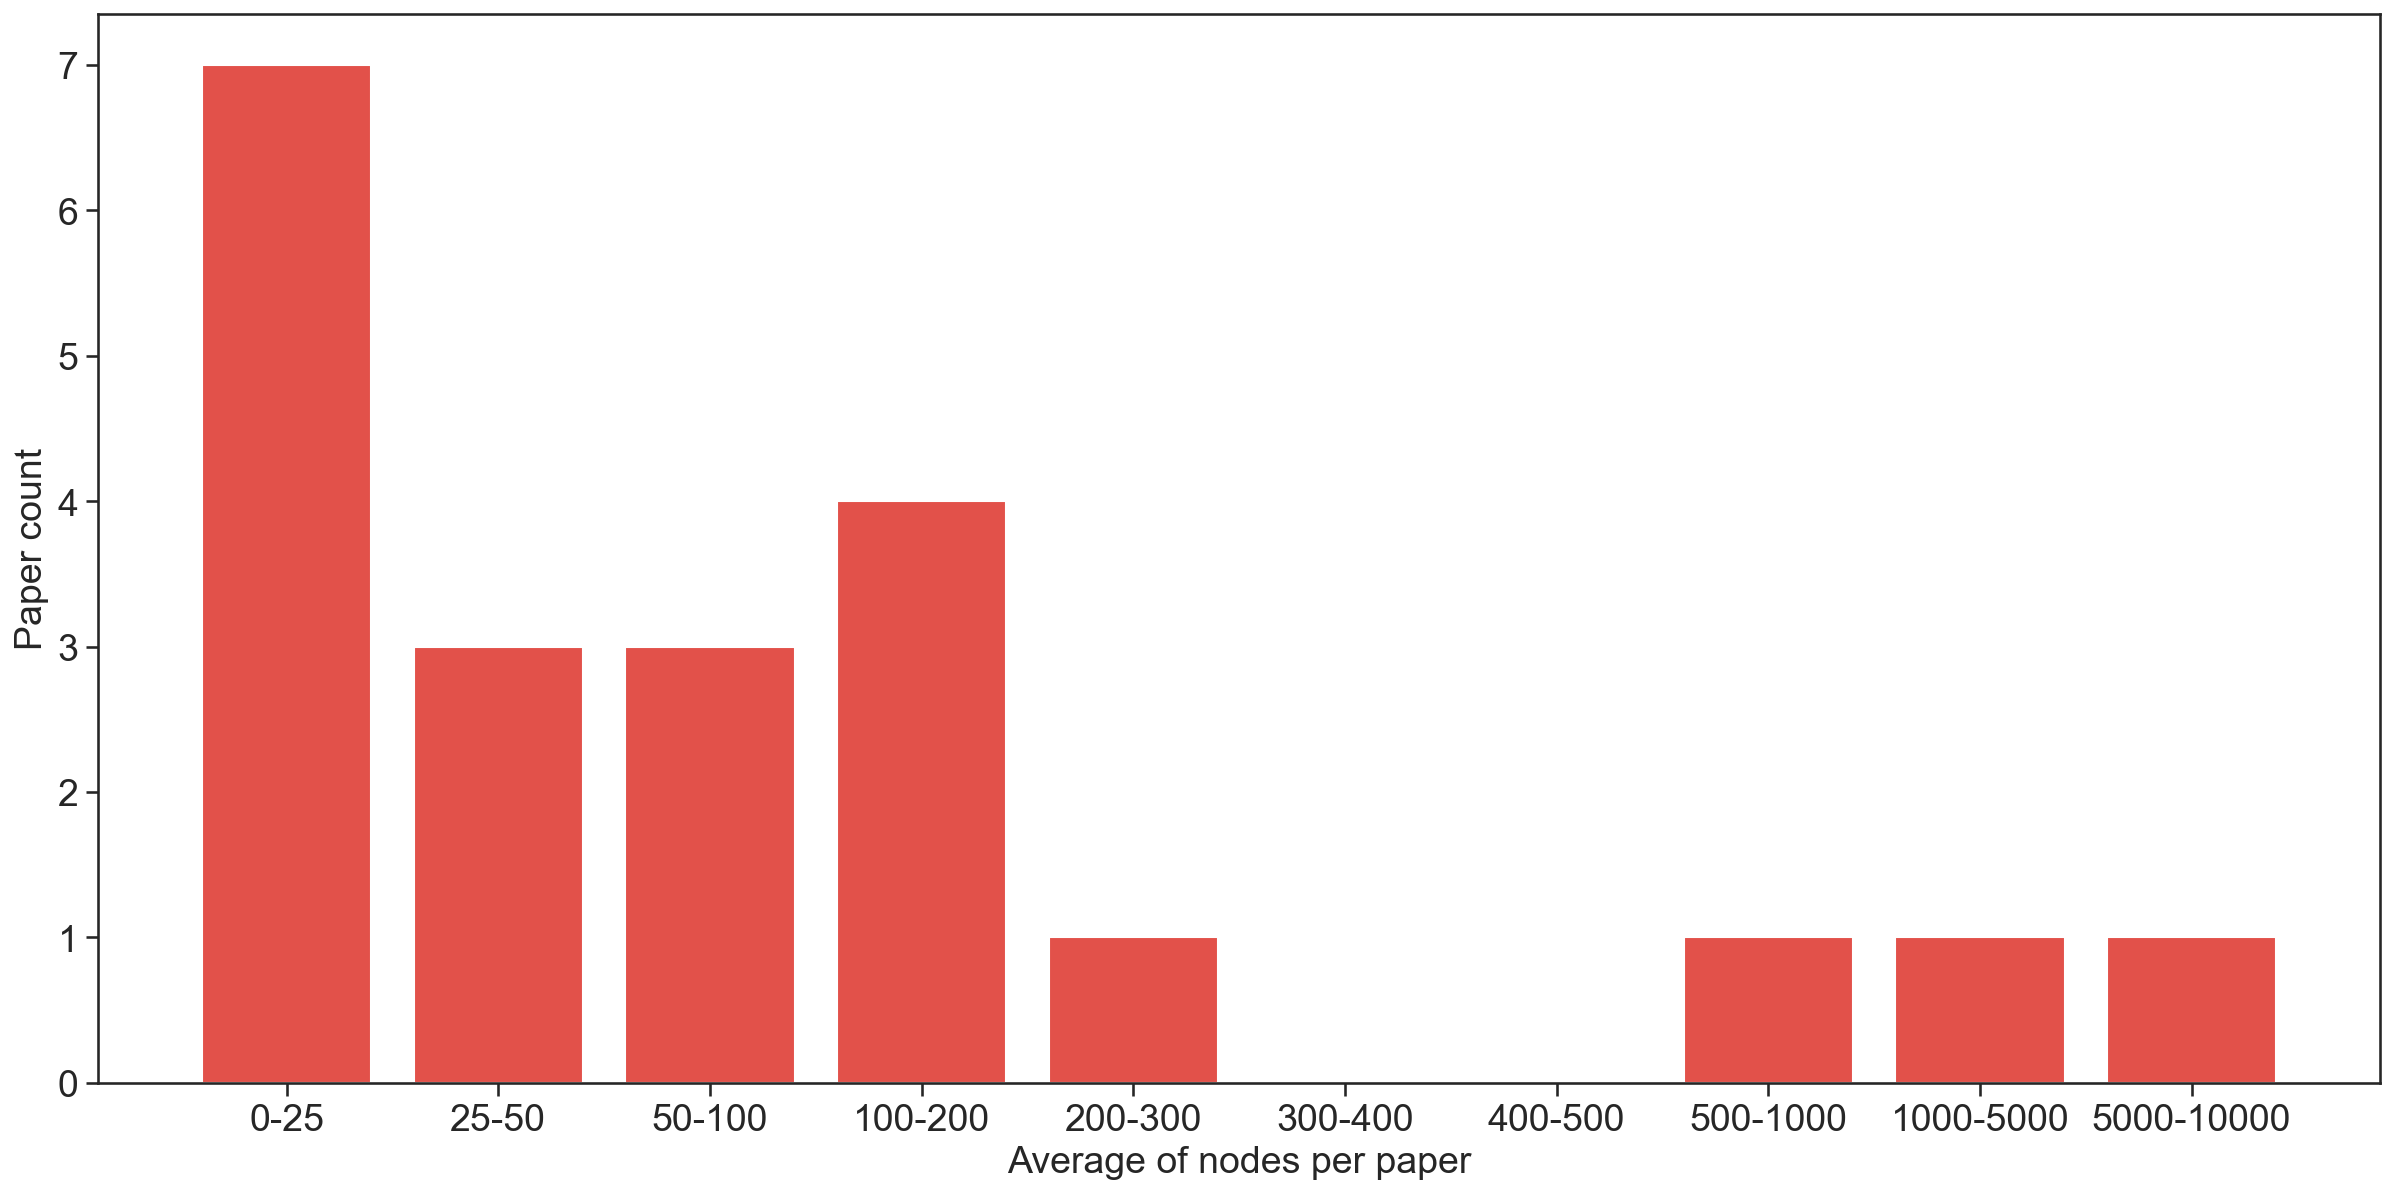

In [15]:

df = pd.read_csv(file_path)
print(df)
bins = [0, 25, 50, 100, 200, 300, 400, 500, 1000, 5000, 50000]
bin_names = ['0-25', '25-50', '50-100', '100-200', '200-300', 
             '300-400', '400-500', '500-1000', '1000-5000', '5000-50000']

# Categorize data into bins
df['Bin'] = pd.cut(df['Edges avg'], bins=bins, labels=bin_names, right=False)

# Count occurrences in each bin
occurrences = df['Bin'].value_counts().sort_index()
print(occurrences)

# Plot the bar chart
plt.figure(figsize=(16, 6))  # Set the figure size
plt.bar(occurrences.index, occurrences.values.astype(int), tick_label=occurrences.index)

# Add labels and title
plt.xlabel('Average of edges per paper', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.ylabel('Paper count', fontsize=18)
# Show the chart
plt.gca().set_yticks([0,1,2,3])
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


file_path = './data/data.csv'
data = pd.read_csv(file_path)
data = data.dropna(thresh=2)

nodes = {'Nodes avg': data['Nodes avg']}
df = pd.DataFrame(nodes)

bins = [0, 25, 50, 100, 200, 300, 400, 500, 1000, 5000, 10000]
bin_names = ['0-25', '25-50', '50-100', '100-200', '200-300', 
             '300-400', '400-500', '500-1000', '1000-5000', '5000-10000']

# Categorize data into bins
df['Bin'] = pd.cut(df['Nodes avg'], bins=bins, labels=bin_names, right=False)

# Count occurrences in each bin
occurrences = df['Bin'].value_counts().sort_index()
print(occurrences)

# Plot the bar chart
plt.figure(figsize=(16, 8))  # Set the figure size
plt.bar(occurrences.index, occurrences.values, tick_label=occurrences.index )

# Add labels and title
plt.xlabel('Average of nodes per paper', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Paper count', fontsize=18)

# Show the chart
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

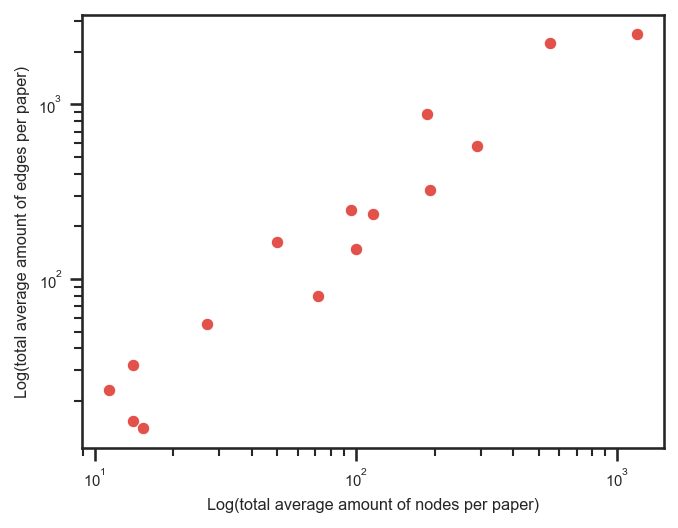

In [13]:
   
sns.scatterplot(data=dataframe,x="Nodes avg", y="Edges avg")
plt.xlabel("Log(total average amount of nodes per paper)")
plt.xscale("log")
plt.ylabel("Log(total average amount of edges per paper)")
plt.yscale("log")
plt.show()

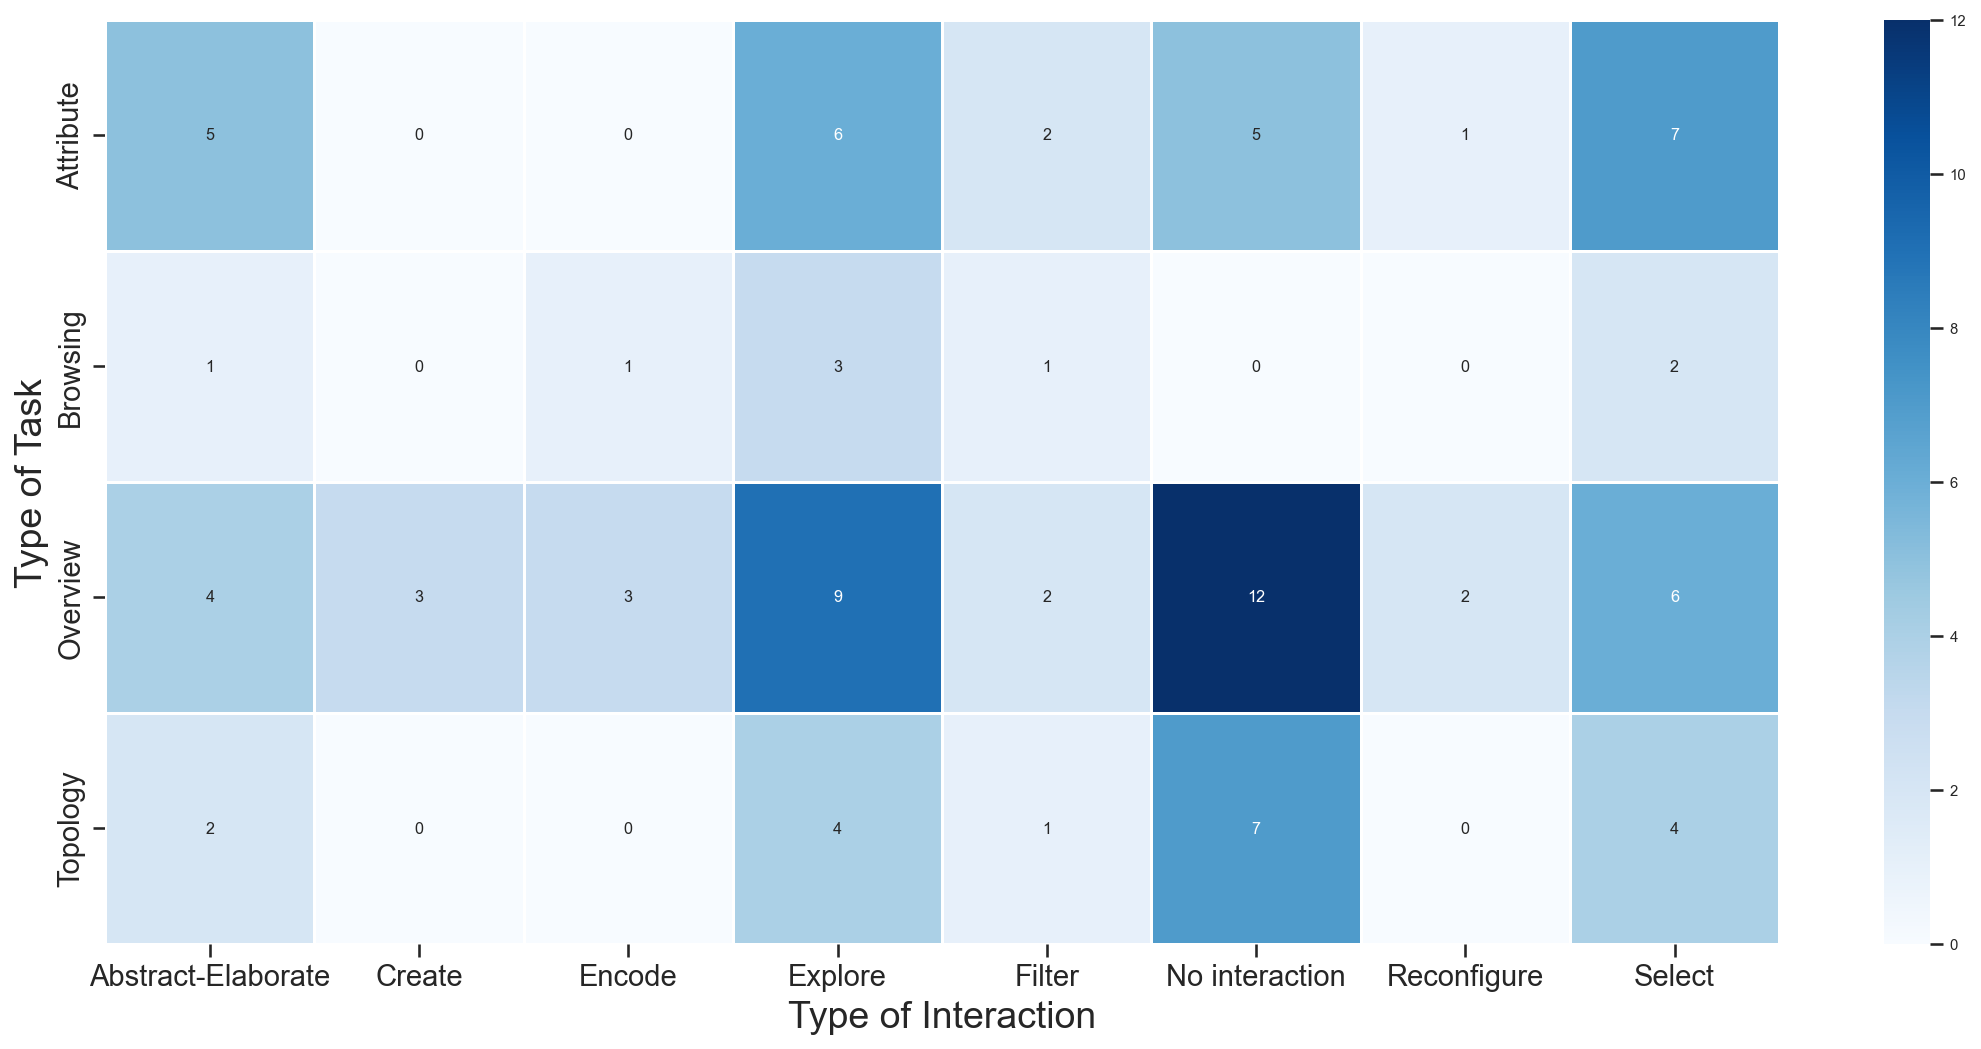

In [12]:


# Split the combined values in 'Type of task' and 'Type of interaction' columns
tasks_split = data['Type of task'].str.get_dummies(sep='/')
interactions_split = data['Type of interaction'].str.get_dummies(sep='/')

# Create a matrix of frequencies for each task and interaction combination
task_interaction_matrix = pd.DataFrame(0, index=tasks_split.columns, columns=interactions_split.columns)

for index, row in data.iterrows():
    if isinstance(row['Type of task'], str) and isinstance(row['Type of interaction'], str):
        tasks = row['Type of task'].split('/')
        interactions = row['Type of interaction'].split('/')
        for task in tasks:
            for interaction in interactions:
                task_interaction_matrix.loc[task, interaction] += 1

# Create a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(task_interaction_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.xlabel('Type of Interaction', fontsize=18)
plt.ylabel('Type of Task', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


Expanded Data:
                                                Title  \
27  DoughNets: Visualising Networks Using Torus Wr...   
0   GraphDescriptor: Augmenting Node-Link Diagrams...   
0   GraphDescriptor: Augmenting Node-Link Diagrams...   
8   Exemplar-based Layout Fine-tuning for Node-lin...   
26  Animated Edge Textures in Node-Link Diagrams: ...   

                                               Author    Year  \
27  Chen, Kun-Ting; Dwyer, Tim; Marriott, Kim; Bac...  2020.0   
0   Pan, Jiacheng; Yan, Zihan; Zhou, Zihan; Zhao, ...  2023.0   
0   Pan, Jiacheng; Yan, Zihan; Zhou, Zihan; Zhao, ...  2023.0   
8   Pan, Jiacheng; Chen, Wei; Zhao, Xiaodong; Zhou...  2021.0   
26  Romat, Hugo; Appert, Caroline; Bach, Benjamin;...  2018.0   

   Sizes noted in paper  Nodes avg  Edges avg  Density avg  \
27                  Yes      11.33       23.0     0.393032   
0                   Yes      14.00       32.0     0.351648   
0                   Yes      14.00       32.0     0.351648   
8  

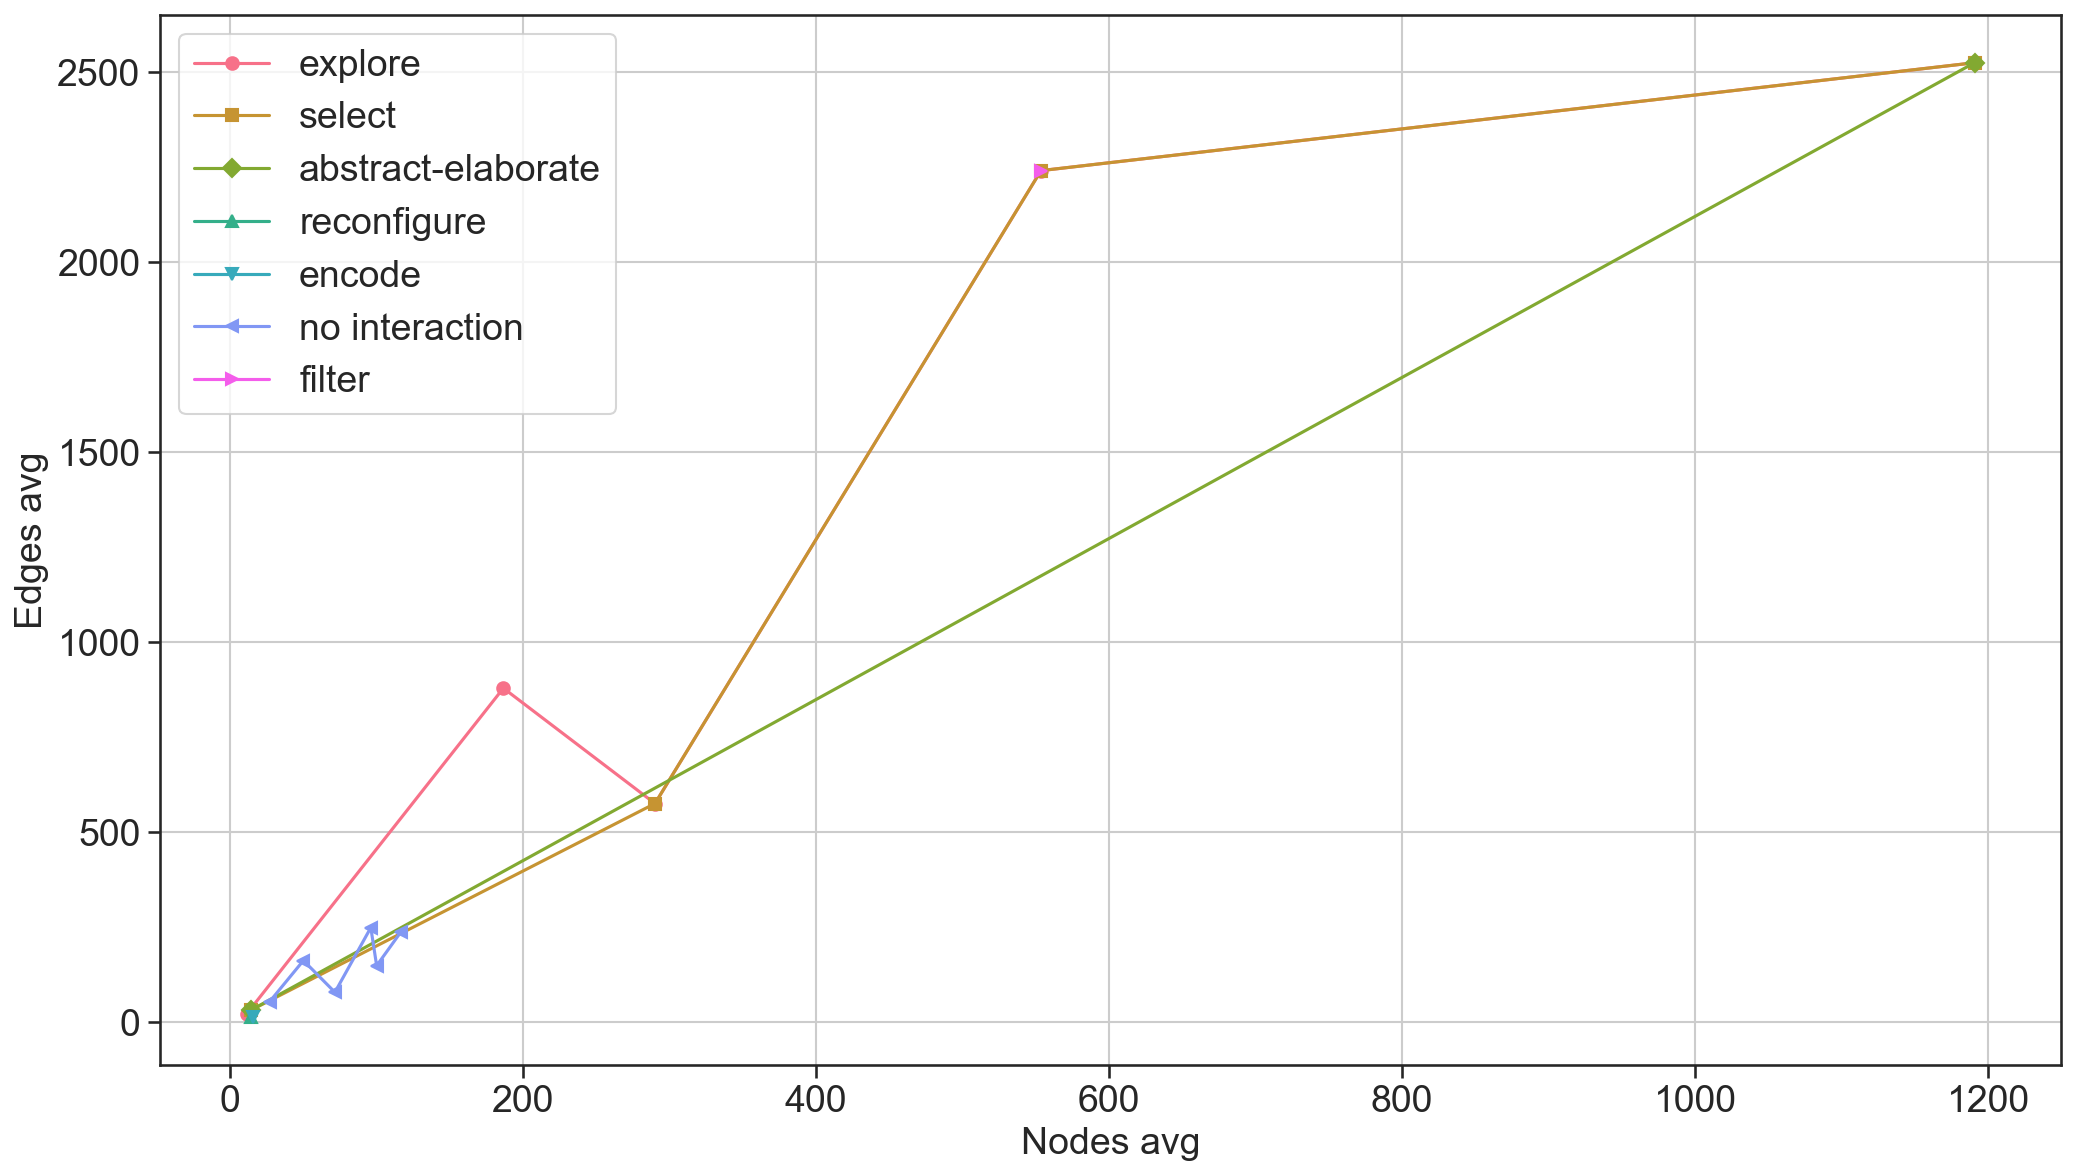

In [17]:


# Define the columns to use
nodes_col = 'Nodes avg'
edges_col = 'Edges avg'
interaction_col = 'Type of interaction'

# Drop rows with missing values in the required columns
data = data.dropna(subset=[nodes_col, edges_col, interaction_col])

# Split multiple interactions into separate rows
data_expanded = data.copy()
data_expanded[interaction_col] = data_expanded[interaction_col].str.split('/')
data_expanded = data_expanded.explode(interaction_col)
data_expanded[interaction_col] = data_expanded[interaction_col].str.strip().str.lower()

# Exclude rows where the 'Type of interaction' is 'none'
data_expanded = data_expanded[data_expanded[interaction_col] != 'none']

# Ensure no NaN values in Nodes avg and Edges avg columns
data_expanded[nodes_col] = data_expanded[nodes_col].fillna(0)
data_expanded[edges_col] = data_expanded[edges_col].fillna(0)

# Sort the data by 'Nodes avg'
data_expanded = data_expanded.sort_values(by=nodes_col)

# Print the expanded data for verification
print("Expanded Data:")
print(data_expanded.head())

# Set the theme and color palette for higher contrast
sns.set_theme(style='ticks', palette='husl')

# Create the figure
plt.figure(figsize=(14, 8))

# Plot the line charts for each interaction type
interaction_types = data_expanded[interaction_col].unique()
palette = sns.color_palette('husl', len(interaction_types))
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', '+', 'x', 'd']

for i, interaction_type in enumerate(interaction_types):
    subset = data_expanded[data_expanded[interaction_col] == interaction_type]
    plt.plot(subset[nodes_col], subset[edges_col], marker=markers[i % len(markers)], 
             label=interaction_type, linestyle='-', color=palette[i])

# Customize the plot
plt.xlabel('Nodes avg', fontsize=18)
plt.ylabel('Edges avg', fontsize=18)
plt.legend(title='Interaction Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Expanded Data:
                                                Title  \
27  DoughNets: Visualising Networks Using Torus Wr...   
27  DoughNets: Visualising Networks Using Torus Wr...   
0   GraphDescriptor: Augmenting Node-Link Diagrams...   
0   GraphDescriptor: Augmenting Node-Link Diagrams...   
8   Exemplar-based Layout Fine-tuning for Node-lin...   

                                               Author    Year  \
27  Chen, Kun-Ting; Dwyer, Tim; Marriott, Kim; Bac...  2020.0   
27  Chen, Kun-Ting; Dwyer, Tim; Marriott, Kim; Bac...  2020.0   
0   Pan, Jiacheng; Yan, Zihan; Zhou, Zihan; Zhao, ...  2023.0   
0   Pan, Jiacheng; Yan, Zihan; Zhou, Zihan; Zhao, ...  2023.0   
8   Pan, Jiacheng; Chen, Wei; Zhao, Xiaodong; Zhou...  2021.0   

   Sizes noted in paper  Nodes avg  Edges avg  Density avg  \
27                  Yes      11.33       23.0     0.393032   
27                  Yes      11.33       23.0     0.393032   
0                   Yes      14.00       32.0     0.351648   
0  

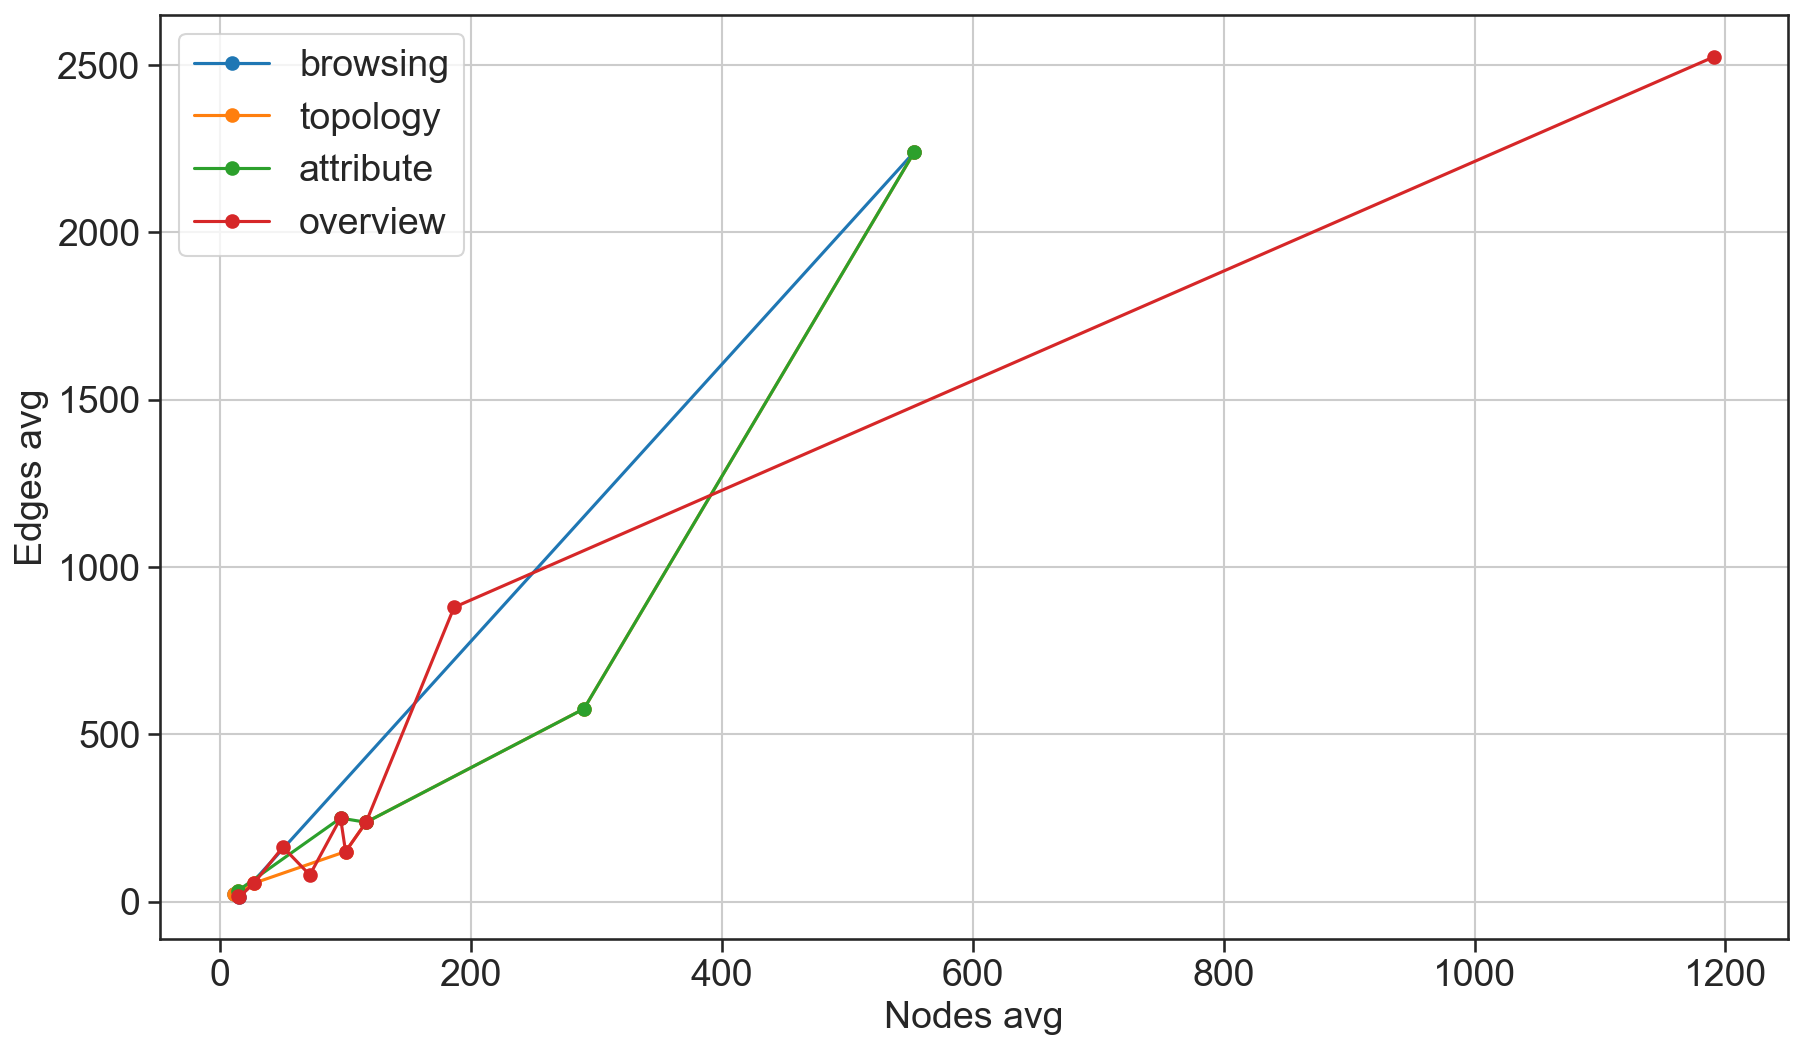

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the columns to use
nodes_col = 'Nodes avg'
edges_col = 'Edges avg'
task_col = 'Type of task'

# Drop rows with missing values in the required columns
data = data.dropna(subset=[nodes_col, edges_col, task_col])

# Split multiple tasks into separate rows
data_expanded = data.copy()
data_expanded[task_col] = data_expanded[task_col].str.split('/')
data_expanded = data_expanded.explode(task_col)
data_expanded[task_col] = data_expanded[task_col].str.strip().str.lower()

# Exclude rows where the 'Type of task' is 'none'
data_expanded = data_expanded[data_expanded[task_col] != 'none']

# Ensure no NaN values in Nodes avg and Edges avg columns
data_expanded[nodes_col] = data_expanded[nodes_col].fillna(0)
data_expanded[edges_col] = data_expanded[edges_col].fillna(0)

# Sort the data by 'Nodes avg'
data_expanded = data_expanded.sort_values(by=nodes_col)

# Print the expanded data for verification
print("Expanded Data:")
print(data_expanded.head())
print(data_expanded.info())

# Create the line charts for each type of task
plt.figure(figsize=(14, 8))

# Set the color palette
palette = sns.color_palette('tab10', n_colors=len(data_expanded[task_col].unique()))

# Plot the line charts
for task_type in data_expanded[task_col].unique():
    subset = data_expanded[data_expanded[task_col] == task_type]
    subset = subset.sort_values(by=[nodes_col, edges_col])  # Sort by Nodes avg and Edges avg
    plt.plot(subset[nodes_col], subset[edges_col], marker='o', label=task_type, linestyle='-', color=palette.pop(0))

plt.xlabel('Nodes avg', fontsize=18)
plt.ylabel('Edges avg', fontsize=18)
plt.legend(title='Task Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()


Discarded visualizations


In [22]:
sns.scatterplot(data=df, x="Nodes avg", y="Edges avg", hue="Type of task")
plt.xscale('log')
plt.show()
sns.scatterplot(data=df, x="Nodes avg", y="Edges avg", hue="Type of interaction")
plt.xscale('log')

plt.show()


sns.scatterplot(data=dataframe, x="Year", y="Nodes avg", hue="Static/Dynamic")
plt.gca().set_yscale("log")
plt.show()


deeef = df[df['Sizes noted in paper'].isin(["Yes", "Partial"])]
sns.swarmplot(data=deeef, x="Year", y="Nodes avg", hue="Sizes noted in paper")
plt.gca().set_yscale('log')
plt.show()

sns.scatterplot(data=dataframe, x='Nodes avg', y='Edges avg', hue='Type of interaction' )
plt.show()


ValueError: Could not interpret value `Edges avg` for `y`. An entry with this name does not appear in `data`.